<a href="https://colab.research.google.com/github/clarissachng/1310-lab/blob/master/parallel_benchmark_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import matplotlib.pyplot as plt
import numpy as np

In [13]:
# Data
threads = list(range(1, 17))
execution_time = [4469140792, 2593640833, 2000549750, 1860529291, 2200514250, 1830314167, 1922124958, 1623005416,
                  1723755875, 1649605792, 1577801917, 1564969416, 1598342333, 1532613250, 1538603416, 1635136375]
memory_usage = [961606336, 977041984, 989117768, 1000886936, 1007418232, 1017584040, 1021525640, 1026174408,
                1028022392, 1033353512, 1033959744, 1036583288, 1040837064, 1043467176, 1041606728, 1046246664]
allocations = [560876, 574127, 585874, 596960, 607510, 617843, 627783, 637507, 647150, 656517, 665308, 674456,
               683441, 692359, 700842, 710097]

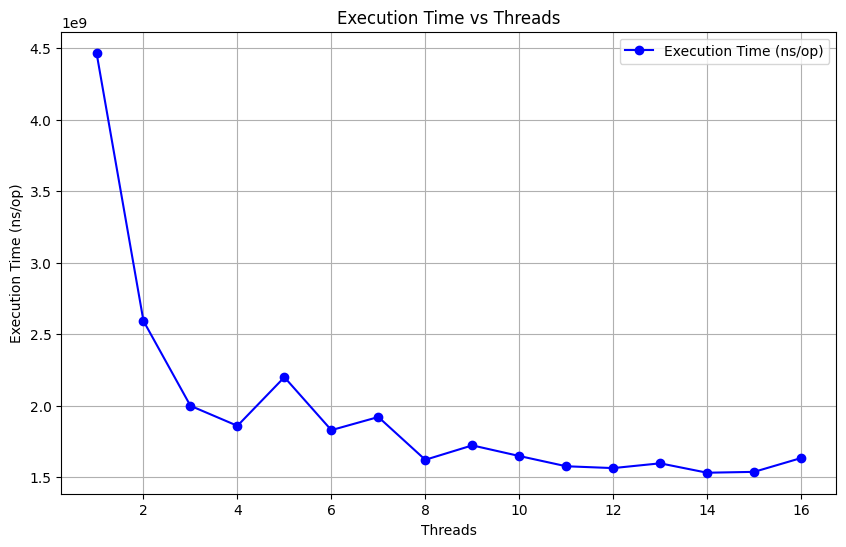

In [14]:
# Plot Execution Time
plt.figure(figsize=(10, 6))
plt.plot(threads, execution_time, marker='o', color='b', label='Execution Time (ns/op)')
plt.xlabel('Threads')
plt.ylabel('Execution Time (ns/op)')
plt.title('Execution Time vs Threads')
plt.grid(True)
plt.legend()

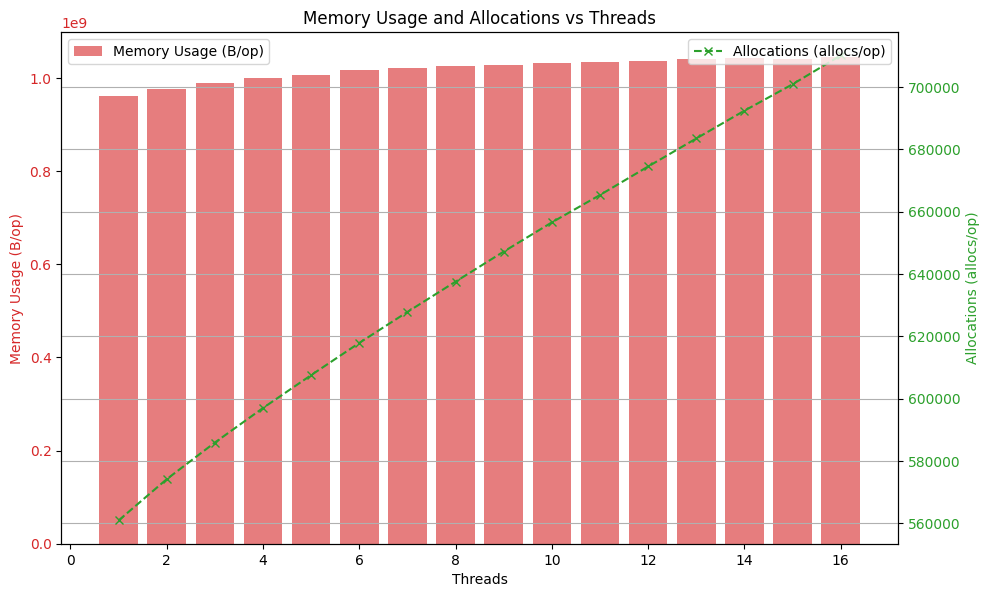

In [15]:
# Plot Memory Usage and Allocations in a separate figure
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:red'
ax1.set_xlabel('Threads')
ax1.set_ylabel('Memory Usage (B/op)', color=color)
ax1.bar(threads, memory_usage, color=color, alpha=0.6, label='Memory Usage (B/op)')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc="upper left")

ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Allocations (allocs/op)', color=color)
ax2.plot(threads, allocations, color=color, marker='x', linestyle='--', label='Allocations (allocs/op)')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc="upper right")

fig.tight_layout()
plt.title('Memory Usage and Allocations vs Threads')
plt.grid(True)

plt.show()

In [20]:
# Data: average runtime for each thread count, adjust values based on your benchmark
threads = list(range(1, 17))
runtime_256 = [
    1124733250, 657289750, 549674729, 469352431, 547483750,
    560356521, 506552458, 474865000, 499115014, 502511896,
    485736889, 555148688, 512149562, 544400354, 457068708, 454490736
]
runtime_512 = [
    4469140792, 2593640833, 2000549750, 1860529291, 2200514250,
    1830314167, 1922124958, 1623005416, 1723755875, 1649605792,
    1577801917, 1564969416, 1598342333, 1532613250, 1538603416, 1635136375
]

memoryusage_256 = [
    237762472, 244470724, 249472612, 257190629, 259748980, 261064552, 263762652,
    264653674, 266172917, 267328856, 266376258, 266215884, 266693180, 266101452,
    268955024, 267618794
]
memoryusage_512 = [
    961606336, 977041984, 989117768, 1000886936, 1007418232, 1017584040, 1021525640, 1026174408,
    1028022392, 1033353512, 1033959744, 1036583288, 1040837064, 1043467176, 1041606728, 1046246664
]

# Width for the bars and positioning for grouped bars
bar_width = 0.35
index = np.arange(len(threads))

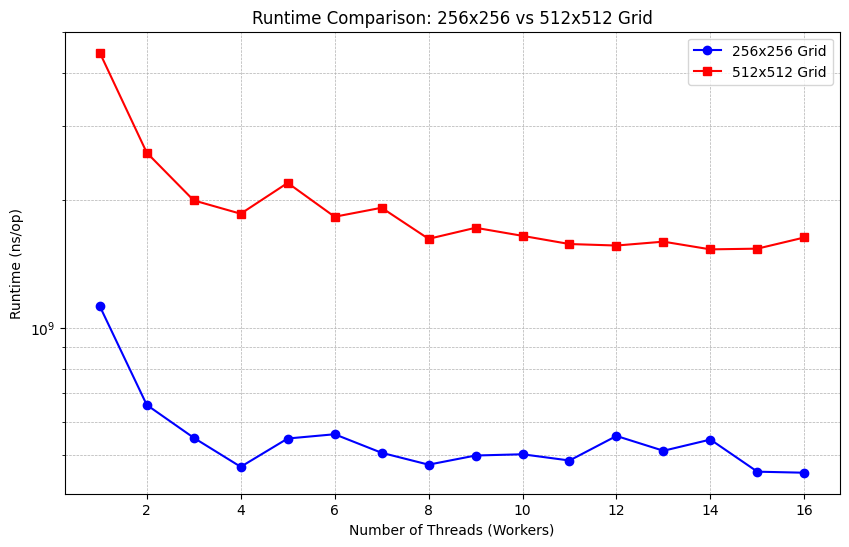

In [17]:
# Create the plot
plt.figure(figsize=(10, 6))

plt.plot(threads, runtime_256, label="256x256 Grid", marker="o", color="b")
plt.plot(threads, runtime_512, label="512x512 Grid", marker="s", color="r")

# Plot formatting
plt.xlabel("Number of Threads (Workers)")
plt.ylabel("Runtime (ns/op)")
plt.title("Runtime Comparison: 256x256 vs 512x512 Grid")
plt.yscale("log")  # Optional: Log scale for easier comparison if large differences exist
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

# Show plot
plt.show()

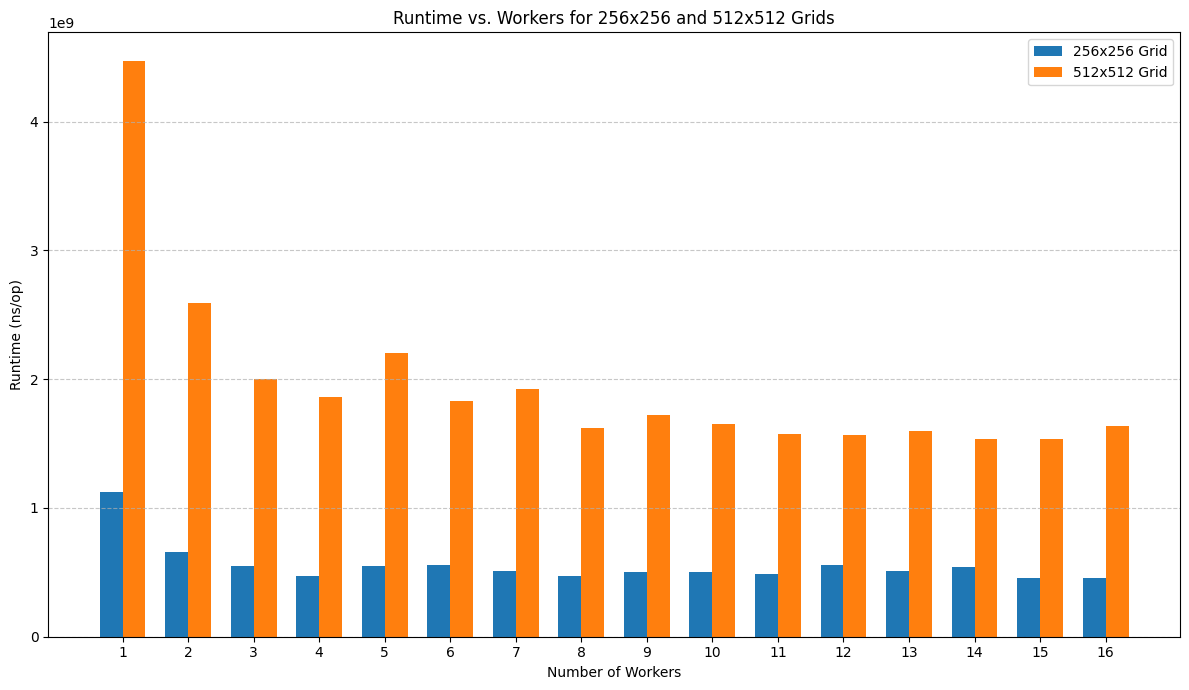

In [19]:
# Plot Runtime vs. Workers as a bar chart
plt.figure(figsize=(12, 7))
plt.bar(index, runtime_256, bar_width, label='256x256 Grid')
plt.bar(index + bar_width, runtime_512, bar_width, label='512x512 Grid')

# Labeling
plt.xlabel("Number of Workers")
plt.ylabel("Runtime (ns/op)")
plt.title("Runtime vs. Workers for 256x256 and 512x512 Grids")
plt.xticks(index + bar_width / 2, threads)  # Center ticks between bars
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

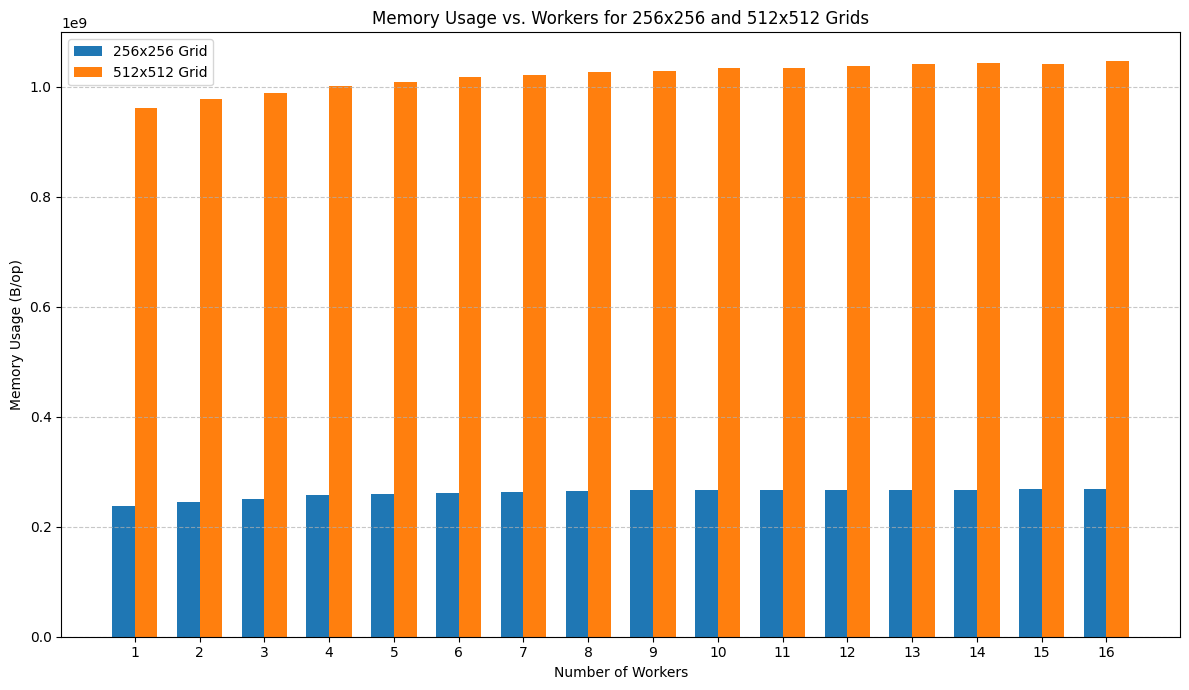

In [21]:
# Plot Memory Usage vs. Workers as a bar chart
plt.figure(figsize=(12, 7))
plt.bar(index, memoryusage_256, bar_width, label='256x256 Grid')
plt.bar(index + bar_width, memoryusage_512, bar_width, label='512x512 Grid')

# Labeling
plt.xlabel("Number of Workers")
plt.ylabel("Memory Usage (B/op)")
plt.title("Memory Usage vs. Workers for 256x256 and 512x512 Grids")
plt.xticks(index + bar_width / 2, threads)  # Center ticks between bars
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()
